In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.671655,0.757627,-9.241804e-07,0.582250,0.714604,-0.025934,0.516273,0.585731,-0.026912,0.499584,...,0.721252,0.466570,-0.022703,0.702232,0.540576,-0.003151,0.716631,0.549804,0.017921,a
1,0.670859,0.763618,-9.133369e-07,0.582885,0.716405,-0.029930,0.516454,0.588614,-0.033246,0.497185,...,0.721296,0.468500,-0.023893,0.702899,0.541322,-0.003450,0.715547,0.550021,0.019026,a
2,0.676330,0.761759,-9.157857e-07,0.582565,0.716709,-0.027272,0.517613,0.585860,-0.027648,0.502161,...,0.724001,0.467104,-0.016684,0.706859,0.541162,0.003318,0.719813,0.549390,0.024831,a
3,0.673033,0.764833,-9.396079e-07,0.586353,0.721180,-0.030339,0.517758,0.590691,-0.033168,0.498243,...,0.725823,0.469397,-0.024000,0.707381,0.543899,-0.003697,0.719061,0.551895,0.018766,a
4,0.679460,0.770003,-9.505802e-07,0.590208,0.724479,-0.029220,0.521601,0.592857,-0.031211,0.501721,...,0.729138,0.472018,-0.024278,0.710024,0.549099,-0.002941,0.722322,0.558854,0.020051,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.556463,0.865982,-8.113130e-07,0.469811,0.839384,-0.024186,0.388532,0.747406,-0.028208,0.334004,...,0.558640,0.530976,-0.026587,0.543539,0.479899,-0.023150,0.536140,0.422089,-0.012430,y
1900,0.578122,0.832764,-8.370526e-07,0.487521,0.803948,-0.022352,0.409647,0.710495,-0.027647,0.354611,...,0.583661,0.509752,-0.032282,0.573490,0.454942,-0.031072,0.564587,0.398012,-0.022235,y
1901,0.589242,0.844031,-8.817325e-07,0.499765,0.814136,-0.026852,0.421974,0.718340,-0.036112,0.366608,...,0.598969,0.520170,-0.027858,0.585330,0.463774,-0.026644,0.577556,0.403343,-0.018753,y
1902,0.586116,0.845954,-8.433327e-07,0.497015,0.814397,-0.027964,0.420778,0.721505,-0.038506,0.364470,...,0.596339,0.525978,-0.025831,0.581846,0.468871,-0.023797,0.574409,0.407882,-0.015252,y


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.671655,0.757627,-9.241804e-07,0.582250,0.714604,-0.025934,0.516273,0.585731,-0.026912,0.499584,...,0.721252,0.466570,-0.022703,0.702232,0.540576,-0.003151,0.716631,0.549804,0.017921,a
1,0.670859,0.763618,-9.133369e-07,0.582885,0.716405,-0.029930,0.516454,0.588614,-0.033246,0.497185,...,0.721296,0.468500,-0.023893,0.702899,0.541322,-0.003450,0.715547,0.550021,0.019026,a
2,0.676330,0.761759,-9.157857e-07,0.582565,0.716709,-0.027272,0.517613,0.585860,-0.027648,0.502161,...,0.724001,0.467104,-0.016684,0.706859,0.541162,0.003318,0.719813,0.549390,0.024831,a
3,0.673033,0.764833,-9.396079e-07,0.586353,0.721180,-0.030339,0.517758,0.590691,-0.033168,0.498243,...,0.725823,0.469397,-0.024000,0.707381,0.543899,-0.003697,0.719061,0.551895,0.018766,a
4,0.679460,0.770003,-9.505802e-07,0.590208,0.724479,-0.029220,0.521601,0.592857,-0.031211,0.501721,...,0.729138,0.472018,-0.024278,0.710024,0.549099,-0.002941,0.722322,0.558854,0.020051,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.556463,0.865982,-8.113130e-07,0.469811,0.839384,-0.024186,0.388532,0.747406,-0.028208,0.334004,...,0.558640,0.530976,-0.026587,0.543539,0.479899,-0.023150,0.536140,0.422089,-0.012430,y
1900,0.578122,0.832764,-8.370526e-07,0.487521,0.803948,-0.022352,0.409647,0.710495,-0.027647,0.354611,...,0.583661,0.509752,-0.032282,0.573490,0.454942,-0.031072,0.564587,0.398012,-0.022235,y
1901,0.589242,0.844031,-8.817325e-07,0.499765,0.814136,-0.026852,0.421974,0.718340,-0.036112,0.366608,...,0.598969,0.520170,-0.027858,0.585330,0.463774,-0.026644,0.577556,0.403343,-0.018753,y
1902,0.586116,0.845954,-8.433327e-07,0.497015,0.814397,-0.027964,0.420778,0.721505,-0.038506,0.364470,...,0.596339,0.525978,-0.025831,0.581846,0.468871,-0.023797,0.574409,0.407882,-0.015252,y


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1904, 63)
Labels shape = (1904,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['k', 'h', 'n', 'a', 'y', 'o', 'x', 'n', 'l', 'b', 'e', 'k', 'p',
       't', 'c', 'w', 'u', 'b', 'y', 'c', 'w', 'x', 'n', 'w', 'a', 'n',
       'q', 'a', 'a', 'o', 'x', 'w', 'r', 'a', 'c', 'f', 'e', 'a', 'b',
       'a', 'w', 'l', 'm', 'a', 'f', 'w', 'b', 'o', 'b', 'l', 'd', 'd',
       'h', 'v', 'r', 'c', 'w', 'q', 't', 'u', 'l', 's', 'x', 'f', 'f',
       'k', 'f', 'a', 'd', 'o', 'u', 'y', 'v', 'e', 'q', 'k', 'h', 'k',
       's', 'l', 'm', 's', 'w', 'v', 'i', 'x', 'v', 'a', 'y', 'f', 'i',
       'b', 'a', 't', 'l', 'n', 'u', 'b', 'y', 'm', 't', 'n', 'v', 'y',
       'u', 'k', 'x', 'h', 'p', 'm', 'd', 'c', 'm', 'h', 'q', 'k', 'o',
       'd', 'f', 'i', 'b', 'o', 'h', 'w', 'i', 'd', 'u', 'r', 'b', 'g',
       'h', 'v', 'd', 'g', 'y', 'c', 'e', 'm', 'e', 'n', 'g', 'i', 'k',
       'e', 'r', 'i', 'f', 'l', 'w', 's', 'f', 'v', 'g', 'r', 'k', 'f',
       's', 's', 'v', 'c', 'a', 'n', 'r', 'm', 'w', 'r', 's', 'e', 'd',
       'u', 'n', 'g', 'u', 's', 'b', 'w', 'f', 's', 'g', 'y', 'a

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9973753280839895, 0.9973753280839895, 0.9973753280839895)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

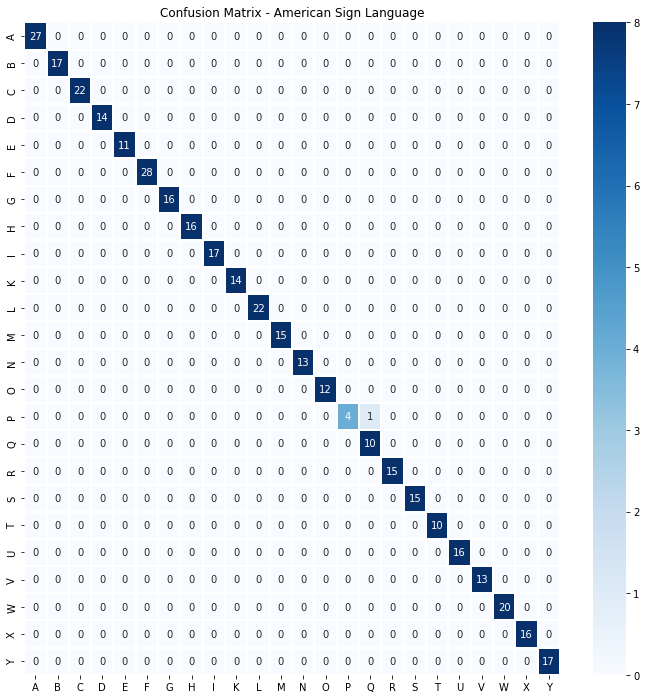

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
#save mapping to file
plt.savefig('confusion_matrix.png')

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)